In [ ]:
import numpy as np
import pandas as pd


In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"theraghavjuneja","key":"d24836b84ec39cad87a34aef68ea0283"}'}

In [ ]:
import os
import zipfile


os.makedirs('/root/.kaggle', exist_ok=True)


!mv kaggle.json /root/.kaggle/


!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
with zipfile.ZipFile("/content/chest-xray-pneumonia.zip", 'r') as zip_ref:
    zip_ref.extractall("chestX-ray")


In [ ]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other


In [ ]:
import os

path = "/content/chestX-ray/chest_xray/train/NORMAL"


all_items = os.listdir(path)


num_files = sum(os.path.isfile(os.path.join(path, item)) for item in all_items)
num_dirs = sum(os.path.isdir(os.path.join(path, item)) for item in all_items)

print(f"Total items: {len(all_items)}")
print(f"Number of files: {num_files}")
print(f"Number of folders: {num_dirs}")


Total items: 1341
Number of files: 1341
Number of folders: 0


In [ ]:
import os

path1 = "/content/chestX-ray/chest_xray/train/NORMAL"
path2 = "/content/chestX-ray/chest_xray/chest_xray/train/NORMAL"

files1 = set(f for f in os.listdir(path1) if os.path.isfile(os.path.join(path1, f)))
files2 = set(f for f in os.listdir(path2) if os.path.isfile(os.path.join(path2, f)))


only_in_path1 = files1 - files2
only_in_path2 = files2 - files1


if only_in_path1 or only_in_path2:
    print("Files only in first path:")
    for f in only_in_path1:
        print(f"- {f}")

    print("\nFiles only in second path:")
    for f in only_in_path2:
        print(f"- {f}")
else:
    print("Both directories contain the same files.")


Files only in first path:

Files only in second path:
- .DS_Store


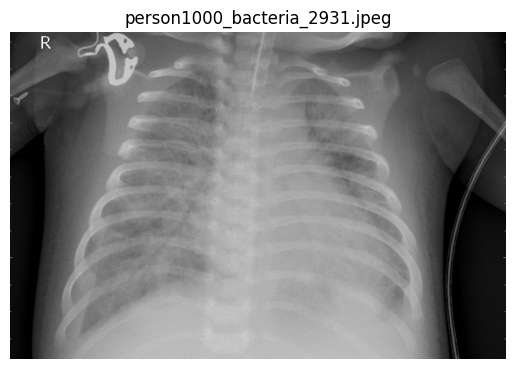

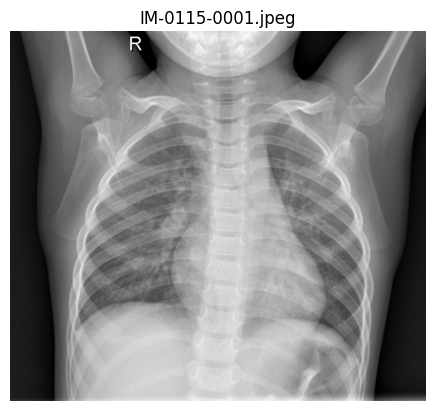

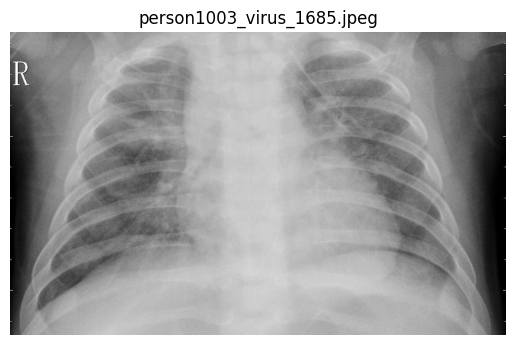

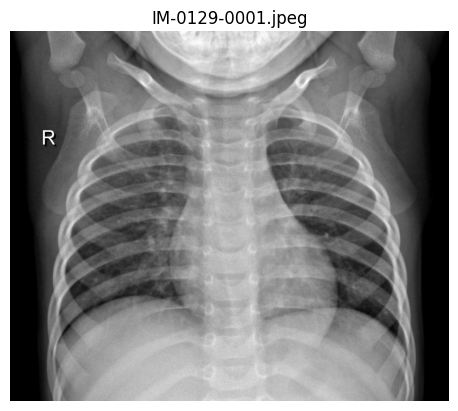

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_image(*args):
    for path in args:
        img = mpimg.imread(path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')  # Hide axes
        plt.title(path.split('/')[-1])
        plt.show()


paths = [
    '/content/chestX-ray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg',
    '/content/chestX-ray/chest_xray/train/NORMAL/IM-0115-0001.jpeg',
    '/content/chestX-ray/chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg','/content/chestX-ray/chest_xray/train/NORMAL/IM-0129-0001.jpeg'
]

# Call the function with unpacked list
view_image(*paths)


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)


val_data = val_datagen.flow_from_directory(
    '/content/chestX-ray/chest_xray/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    '/content/chestX-ray/chest_xray/train',
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary'
)




Found 5216 images belonging to 2 classes.


File Counts:
| Category   | Count   |
|:-----------|:--------|
| PNEUMONIA  | 3875    |
| NORMAL     | 1341    |


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2 non-null      object
 1   Count     2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 164.0+ bytes
None




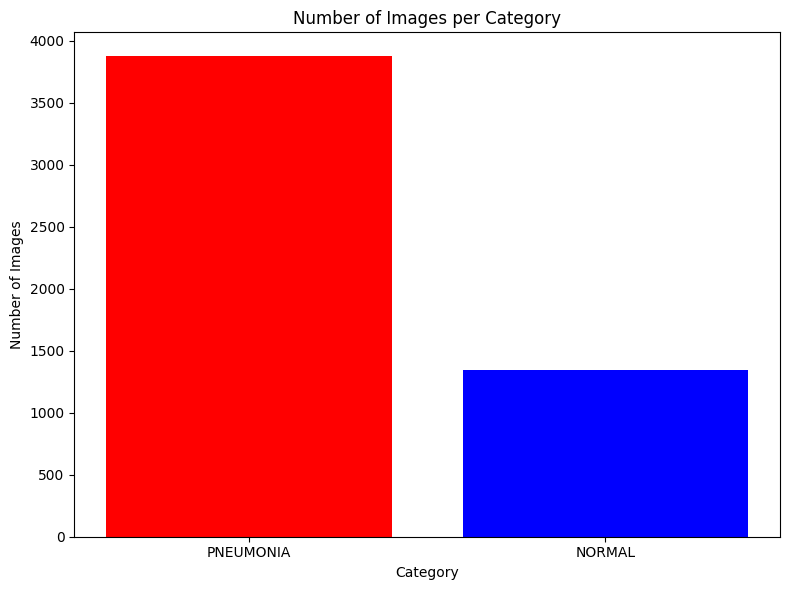

In [ ]:
pneumonia_dir = "/content/chestX-ray/chest_xray/train/PNEUMONIA"
normal_dir = "/content/chestX-ray/chest_xray/train/NORMAL"


num_pneumonia = len([f for f in os.listdir(pneumonia_dir) if os.path.isfile(os.path.join(pneumonia_dir, f))])
num_normal = len([f for f in os.listdir(normal_dir) if os.path.isfile(os.path.join(normal_dir, f))])


data = {'Category': ['PNEUMONIA', 'NORMAL'], 'Count': [num_pneumonia, num_normal]}
df = pd.DataFrame(data)


print("File Counts:")
print(df.to_markdown(index=False, numalign="left", stralign="left"))
print("\n")

print("DataFrame Information:")
print(df.info())
print("\n")


plt.figure(figsize=(8, 6))
plt.bar(df['Category'], df['Count'], color=['red', 'blue'])
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(df['Category'])
plt.tight_layout()
plt.show()

In [ ]:
# so most of the images are of Pneumonia (good for us)(no issue)

In [ ]:
#  i will start with a very simple cnn

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model using the data from ImageDataGenerator
history = model.fit(train_data, epochs=10, steps_per_epoch=train_data.samples // train_data.batch_size)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 107s 611ms/step - accuracy: 0.7766 - loss: 0.5231
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 594ms/step - accuracy: 0.8967 - loss: 0.2379
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 585ms/step - accuracy: 0.9186 - loss: 0.1991
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 592ms/step - accuracy: 0.9180 - loss: 0.2066
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 590ms/step - accuracy: 0.9293 - loss: 0.1724
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 592ms/step - accuracy: 0.9249 - loss: 0.1885
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 588ms/step - accuracy: 0.9444 - loss: 0.1410
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 582ms/step - accuracy: 0.9452 - loss: 0.1432
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 601ms/step - accuracy: 0.9495 - loss: 0.1333
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 598ms/step - accuracy: 0.9523 - loss: 0.1328


In [ ]:

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    '/content/chestX-ray/chest_xray/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 0.8861 - loss: 0.4256
Test Loss: 0.4513769745826721
Test Accuracy: 0.8846153616905212


In [ ]:

model.save('/content/chestX-ray/chest_xray_model.h5')


In [ ]:
# Save only the model weights with the required file extension
model.save_weights('/content/chestX-ray/chest_xray_model_weights.weights.h5')
